In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = pd.DataFrame(data)
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [2]:
df_copy = df.copy()

In [3]:
labels = ['18-30', '30-50', '50-70', '+70']
bins = [17,30,50,70,100]
df_copy['Age'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)

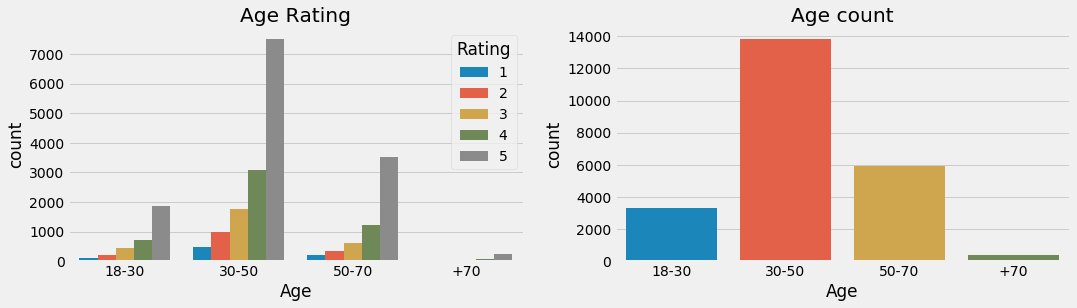

In [4]:
plt.style.use('fivethirtyeight')
fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1, figsize=(16,4))
g = sns.countplot(x=df_copy['Age'], hue=df_copy['Rating'], ax=ax0).set(title='Age Rating')
g = sns.countplot(df_copy['Age'], ax=ax1).set(title='Age count')
plt.show()

Se puede observar que las mejores califiaciones para esta tienda provienen de personas entre los rangos mas altos de las edades 30-50 y 50-70, esto muestra poco flujo de personas jovenes interesadas en los productos. Igual se mantiene un flujo de publico alto en edades 30-50.

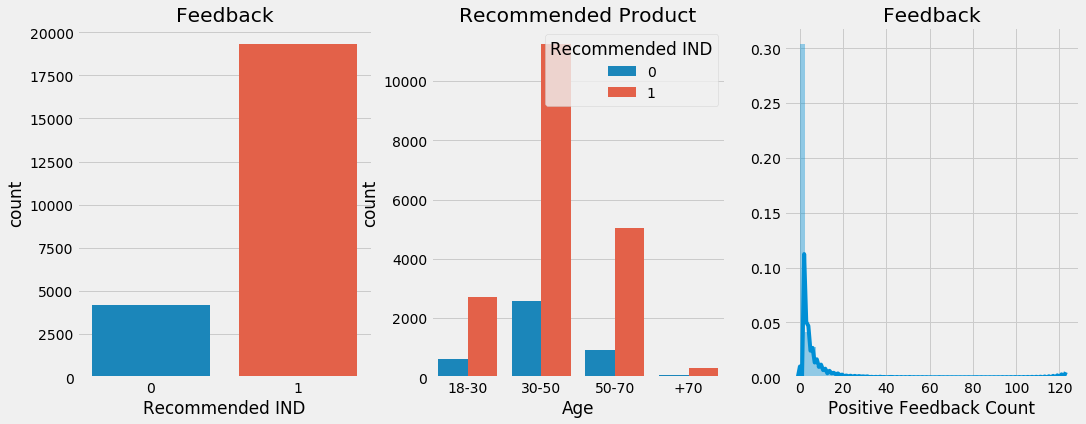

In [5]:
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3,nrows=1, figsize=(16,6))
g = sns.countplot(x=df_copy['Age'], hue=df_copy['Recommended IND'], ax=ax1).set(title='Recommended Product')
g = sns.distplot(df_copy['Positive Feedback Count'], ax=ax2).set(title='Feedback')
g = sns.countplot(df_copy['Recommended IND'], ax=ax0).set(title='Feedback')
plt.show()

Para la mayoria de productos se encuentra satisfaccion que se observa en la cantidad de recomendaciones que se producen observandose una mayoria para cada clase de edad.

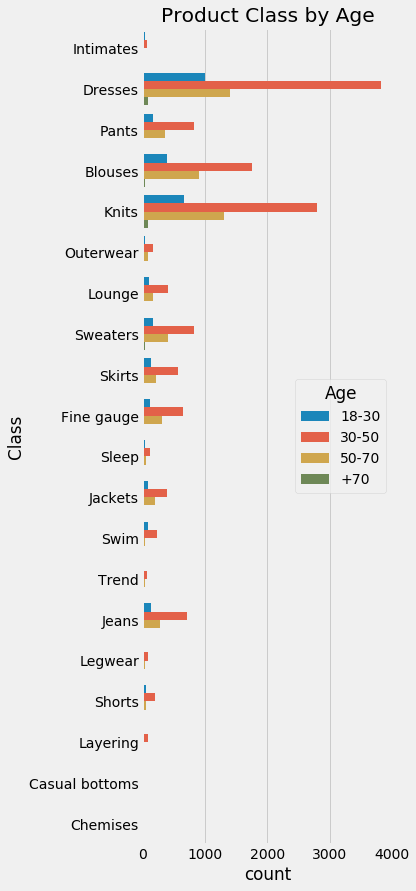

In [6]:
plt.figure(figsize=(4,14))
g = sns.countplot(y=df_copy['Class Name'], hue=df_copy['Age']).set(title='Product Class by Age', ylabel='Class')

La mayoria de productos que se compran y que cuentan con revisiones para este dataset son productos como blusas, ropa tejida, vestidos y pantalones.

In [7]:
df = df.dropna(how='any')

In [8]:
#NUMERO DE PALABAS POR RESEÑA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 

df["CL_reviews"] = df['Review Text'].apply(lambda x: word_tokenize(x))
df["CL_reviews"] =  df['CL_reviews'].apply(lambda x: [w for w in x if w not in stop_words])
df["CL_reviews"] =  df['CL_reviews'].apply(lambda x: " ".join(x))

tokens = [word_tokenize(sentence) for sentence in df['Review Text']]
len_words = []
for i in range(len(tokens)):
    len_words.append(len(tokens[i]))
    

df['n_words'] = len_words
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,CL_reviews,n_words
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I high hopes dress really wanted work . initia...,110
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love , love , love jumpsuit . 's fun , flirt...",31
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt flattering due adjustable front tie...,41
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"I love tracy reese dresses , one petite . 5 fe...",107
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,I aded basket hte last mintue see would look l...,121


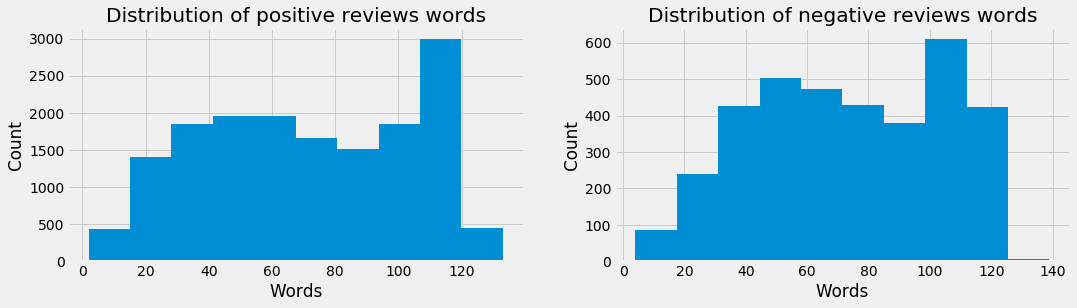

In [9]:
positive = df[df['Recommended IND']==1]
negative = df[df['Recommended IND']==0]

fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1, figsize=(16,4))
ax0.hist(positive['n_words'])
ax0.set_title('Distribution of positive reviews words')
ax0.set_xlabel('Words')
ax0.set_ylabel('Count')
ax1.hist(negative['n_words'])
ax1.set_title('Distribution of negative reviews words')
ax1.set_xlabel('Words')
ax1.set_ylabel('Count')
plt.show()

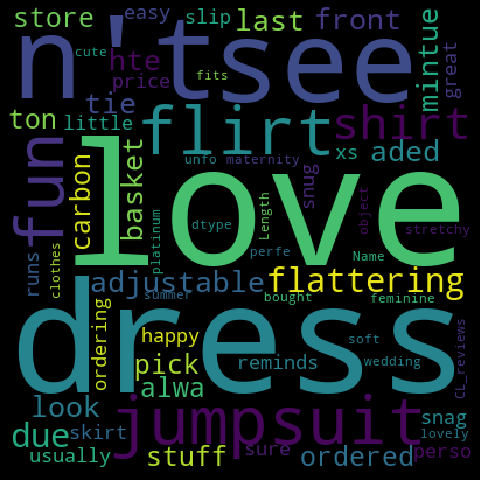

In [10]:
from wordcloud import WordCloud, STOPWORDS

#NUBE DE PALABRAS PARA LAS CALIFICACIONES DE POSITIVAS
stopwords = set(STOPWORDS)
positive_wordcloud = WordCloud(width=400, height=400).generate(str(positive["CL_reviews"]))
plt.figure(figsize=(8,8), facecolor='black')
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.show()

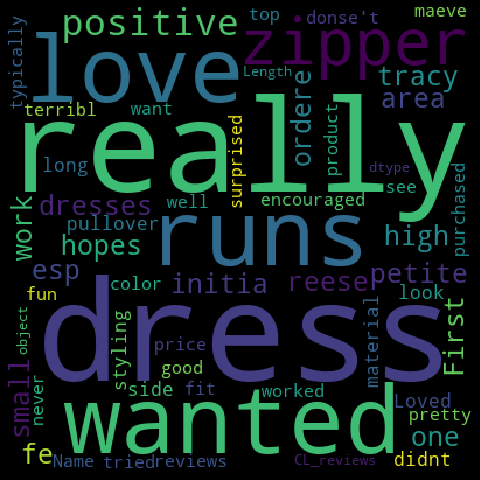

In [11]:
#NUBE DE PALABRAS PARA LAS CALIFICACIONES DE NEGATIVAS
negative_wordcloud = WordCloud(width=400, height=400).generate(str(negative["CL_reviews"]))
plt.figure(figsize=(8,8), facecolor='black')
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
vect = TfidfVectorizer(ngram_range=(1,2), stop_words=ENGLISH_STOP_WORDS,token_pattern=r'\b[^\d\W][^\d\W]+\b')
X = vect.fit_transform(df['CL_reviews'])

In [13]:
words_rev = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
words_rev.head()

,______,______ pros,_______,_______ cons,_______ pros,________,________ cons,________ pros,_________,_________ cons,...,zoom closely,zoom interesting,zoom ll,zoom work,zooming,zooming fabric,zuma,zuma reference,ã¼ber,ã¼ber cute
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
Y = df['Recommended IND'] 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [23]:
Y_pred = rf_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
report = classification_report(y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.10      0.18      1092
           1       0.83      1.00      0.91      4807

    accuracy                           0.83      5899
   macro avg       0.90      0.55      0.54      5899
weighted avg       0.86      0.83      0.77      5899



In [19]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
lg_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [20]:
Y_pred_lg = lg_model.predict(X_test)

In [21]:
report = classification_report(y_test, Y_pred_lg)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1092
           1       0.95      0.91      0.93      4807

    accuracy                           0.88      5899
   macro avg       0.80      0.84      0.82      5899
weighted avg       0.89      0.88      0.89      5899



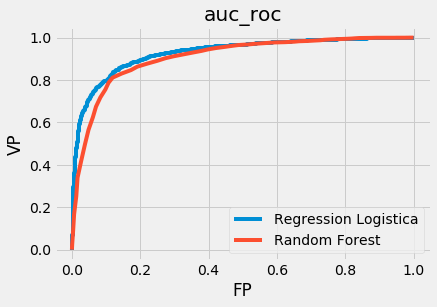

In [25]:
LR_prob = lg_model.predict_proba(X_test)
RF_prob = rf_model.predict_proba(X_test)
LR_prob = LR_prob[:,1]
RF_prob = RF_prob[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

## CALCULAMOS LA CURVA AUROC
lr_auroc = roc_auc_score(y_test, LR_prob)
rf_auroc = roc_auc_score(y_test, RF_prob)

rlr_fpr, rlr_tpr, _ = roc_curve(y_test, LR_prob)
rsv_fpr, rsv_tpr, _ = roc_curve(y_test, RF_prob)

plt.plot(rlr_fpr, rlr_tpr, label = 'Regression Logistica' % lr_auroc)
plt.plot(rsv_fpr, rsv_tpr, label = 'Random Forest' % rf_auroc)
plt.title('auc_roc')
plt.xlabel('FP')
plt.ylabel('VP')
plt.legend()
#plt.show()

#### Conclusiones
Esto depende de lo que se busque y que clase nos importe mas.

Para el algoritmo de Random Forest se obtiene para la clase 0 una precision alta pero un recall demasiado bajo lo cual concluimos que este no encuentra bien la clase pero cuando lo hace, lo realiza de manera efectiva mientras que la clase 1 la maneja perfecto.

Un buen modelo para poder predecir si esta persona recomendara el producto en base a su critica puesta en la pagina es la regresion logistica planteada anteriormente para las clases desbalanceadas, encontrado un equilibrio para las clases